# **ML Assignment 4**
Submitted by Kshitij Mittal

In [35]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

In [36]:
#pip install pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

import pandarallel
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

Available CPUs: 8
INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [37]:
import sklearn.metrics

## **Part 1: Data Processing**

a) Import the data: You are provided separate .csv files for train and test.

In [38]:
df_train = pd.read_csv('/Users/kshitijmittal/Documents/UChicago Acad/03 Quarter 3/01 ML/99 Assignments/04 SVM/train_data.csv')
print(df_train.shape)
df_train.head()

(507, 148)


,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


In [74]:
df_train.columns

Index(['class', 'BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx',
       'Mean_G', 'Mean_R', 'Mean_NIR',
       ...
       'SD_NIR_140', 'LW_140', 'GLCM1_140', 'Rect_140', 'GLCM2_140',
       'Dens_140', 'Assym_140', 'NDVI_140', 'BordLngth_140', 'GLCM3_140'],
      dtype='object', length=148)

In [39]:
df_train['class'].unique()
# We have 9 different target variable classes

array(['concrete ', 'shadow ', 'tree ', 'asphalt ', 'building ', 'grass ',
       'pool ', 'car ', 'soil '], dtype=object)

In [40]:
df_test = pd.read_csv('/Users/kshitijmittal/Documents/UChicago Acad/03 Quarter 3/01 ML/99 Assignments/04 SVM/test_data.csv')
print(df_test.shape)
df_test.head()

(168, 148)


,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


b) Remove any rows that have missing data across both sets of data.

In [41]:
df_train=df_train.dropna(how='any')
print(df_train.shape)
df_train.isna().sum().sum()

(507, 148)


0

In [42]:
df_test=df_test.dropna(how='any')
print(df_test.shape)
df_test.isna().sum().sum()

(168, 148)


0

c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [43]:
X_train = df_train.drop(['class'], axis=1)
X_test = df_test.drop(['class'], axis=1)
y_train = df_train['class']
y_test=df_test['class']

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (507, 147)
X_test:  (168, 147)
y_train:  (507,)
y_test:  (168,)


In [44]:
y_train=y_train.map({'concrete ':1, 'shadow ':2, 'tree ':3, 'asphalt ':4, 'building ':5, 'grass ':6,'pool ':7, 'car ':8, 'soil ':9})
y_test=y_test.map({'concrete ':1, 'shadow ':2, 'tree ':3, 'asphalt ':4, 'building ':5, 'grass ':6,'pool ':7, 'car ':8, 'soil ':9})

d) Scale all features / predictors (NOT THE TARGET VARIABLE)

The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler. 

In [45]:
# Fiting on X Train first

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

print("total number of features:", scaler.n_features_in_)

X_train_scaled= scaler.transform(X_train)
X_train_scaled

total number of features: 147


array([[-1.14075473, -0.61823212, -0.76157526, ..., -0.95313273,
         0.10334763,  0.34780924],
       [-0.70431561,  0.43196247, -0.53002518, ..., -1.25230517,
        -1.09711859,  2.92039508],
       [-0.99527502, -0.21993185, -0.42315592, ...,  0.5427295 ,
        -0.1830858 , -0.71544325],
       ...,
       [ 0.68582378,  0.13825184,  0.25368276, ..., -0.87833962,
         1.09218151,  0.26440108],
       [-0.20321885, -0.67840698, -0.40534437, ..., -1.10271895,
        -0.61364815,  0.6910969 ],
       [ 0.73431702, -0.58384648,  0.78802909, ..., -1.02792584,
        -1.00589775,  1.66713547]])

In [46]:
# Extrapolating on X Test

X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[-1.22157678, -0.67554151, -0.47659055, ..., -0.8035465 ,
        -1.22482777,  5.07003463],
       [ 0.54034408, -0.46063129,  0.57429056, ..., -0.87833962,
         0.31680439,  0.65268303],
       [ 0.1523982 , -0.42481292,  0.41398666, ..., -0.72875339,
        -0.75960149, -0.0149197 ],
       ...,
       [ 1.52637318, -0.44487121,  0.87708681, ...,  0.24355706,
        -0.41113789, -0.52522991],
       [-0.73664444, -0.49644966,  0.05775578, ...,  0.46793639,
        -1.04421051,  0.89748944],
       [ 0.1523982 ,  0.3918459 , -0.63689445, ..., -0.87833962,
         1.47895786,  0.95528835]])

### **Visualizing the Data with PCA**

In [47]:
def fit_pca(df, n_components):
    # YOUR CODE HERE
    from sklearn.decomposition import PCA
    stscaler=StandardScaler().fit(df)
    scaled_df=stscaler.transform(df)
    pca=PCA(n_components)
    pca.fit(df)
    pca_features=pca.transform(df)
    return pca

In [48]:
pca_X_train=fit_pca(X_train,2)
pca_X_train.explained_variance_

array([1.29027505e+08, 1.48050369e+07])

In [49]:
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca_X_train
pip_pca=make_pipeline(scaler, pca_X_train)

X_train_pca=pip_pca.fit_transform(X_train)
X_train_pca

array([[  0.7571956 ,   2.16266871],
       [  2.47010918, -10.41325602],
       [ -2.97085979,  -3.3596302 ],
       ...,
       [  7.0573766 ,   0.07255637],
       [  2.44399896,   0.51743171],
       [  8.59776322,  -2.01152138]])

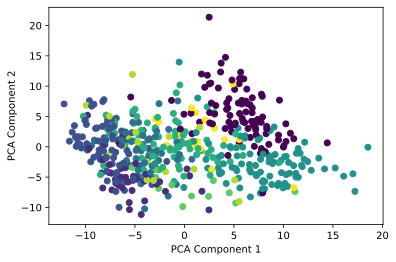

In [50]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [51]:
X_train_pca_3=make_pipeline(scaler, fit_pca(X_train,3)).fit_transform(X_train)
X_train_pca_3

array([[  0.7571956 ,   2.16266883,  -2.15708226],
       [  2.47010918, -10.41325611,  10.56570291],
       [ -2.97085979,  -3.3596302 ,   9.28202965],
       ...,
       [  7.0573766 ,   0.07255635,  -1.81304648],
       [  2.44399896,   0.51743174,  -2.03789767],
       [  8.59776322,  -2.01152141,   0.31661613]])

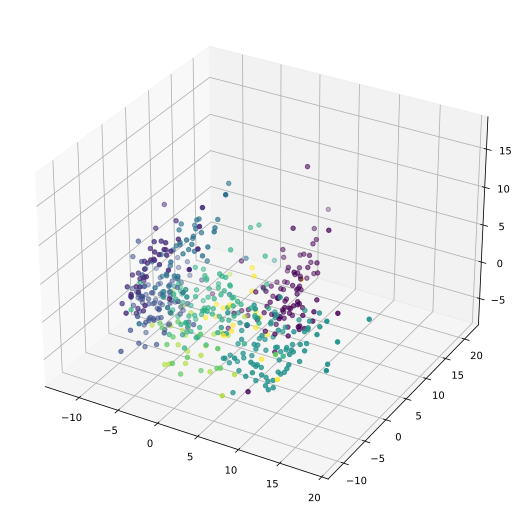

In [52]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (7, 7)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_pca_3[:, 0], X_train_pca_3[:, 1], X_train_pca_3[:, 2], c=y_train)

From an initial view from the PCA, data does not look particularly linearly separable. Linear SVMs might not work the best for these

----
## **Part 2. Random Forest Classifier - Base Model:**

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_rf=rf.predict(X_test_scaled)
y_pred_proba_rf=rf.predict_proba(X_test_scaled)

print("Predicted Classes")
print(y_pred_rf)
print("\n")
print("Class Probabilities")
print(y_pred_proba_rf)

Predicted Classes
[8 1 5 1 1 6 8 8 5 3 5 4 5 6 2 5 3 9 5 2 7 4 1 3 6 1 6 5 5 5 4 2 1 6 3 1 4
 1 3 1 1 3 5 5 5 6 6 2 1 9 2 3 8 8 4 7 5 3 6 6 8 8 7 5 9 6 5 5 5 9 1 5 4 7
 7 2 5 6 4 4 7 7 5 5 5 2 5 6 4 6 6 6 5 1 1 6 7 8 2 3 6 4 3 8 3 4 6 5 1 6 4
 6 6 8 1 3 6 1 1 8 8 6 2 7 3 4 3 7 5 6 1 4 4 1 4 6 2 7 7 7 8 5 1 4 1 4 5 2
 2 3 6 4 3 2 1 5 1 3 4 1 6 3 3 8 9 6 6 1]


Class Probabilities
[[0.18 0.   0.   ... 0.07 0.3  0.16]
 [0.77 0.   0.   ... 0.   0.07 0.  ]
 [0.11 0.   0.   ... 0.   0.   0.01]
 ...
 [0.   0.   0.06 ... 0.05 0.   0.02]
 [0.01 0.   0.11 ... 0.05 0.   0.04]
 [0.95 0.   0.   ... 0.   0.   0.04]]


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[18,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0, 13,  0,  3,  0,  0,  0,  0,  0],
       [ 1,  0, 15,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1, 22,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0, 25,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 13,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 13,  0],
       [ 5,  0,  0,  0,  1,  3,  0,  0,  5]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.69      0.78      0.73        23
           2       1.00      0.81      0.90        16
           3       0.79      0.88      0.83        17
           4       0.70      1.00      0.82        14
           5       0.76      0.88      0.81        25
           6       0.86      0.86      0.86        29
           7       1.00      0.87      0.93        15
           8       0.93      0.87      0.90        15
           9       1.00      0.36      0.53        14

    accuracy                           0.82       168
   macro avg       0.86      0.81      0.81       168
weighted avg       0.85      0.82      0.82       168



In [57]:
# d)  Calculate predictions for the training data & build the classification report & confusion matrix. 
# Are there signs of overfitting? Why or why not?

y_pred_train_rf=rf.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        20

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507



We see a perfect fit for the training data, as both precision and recall values are 1 for every class. This signifies significant overfitting in the Random Forest Model

<AxesSubplot:title={'center':'Feature Importance - Random Forest'}>

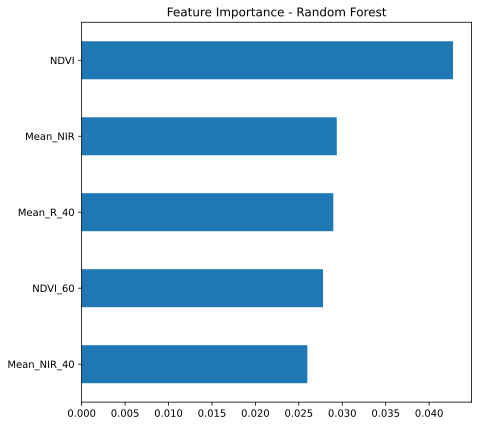

In [58]:
# e) Identify the top 5 features. Feel free to print a list OR to make a plot.
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values().tail().plot(kind='barh', title='Feature Importance - Random Forest')

----
## **Part 3. LinearSVM Classifier - Base Model:**


In [59]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(random_state=42)
lin_svc.fit(X_train_scaled, y_train)

LinearSVC(random_state=42)

In [60]:
print("Number of original examples", len(X_train_scaled))

Number of original examples 507


In [61]:
y_pred_lin_svc=lin_svc.predict(X_test_scaled)

print("Predicted Classes")
print(y_pred_lin_svc)

Predicted Classes
[8 1 5 1 4 6 8 8 5 3 5 4 5 6 2 5 6 5 5 2 7 2 1 6 6 1 6 5 5 5 4 2 5 6 6 5 4
 1 3 1 9 3 5 5 5 6 6 2 5 9 2 3 8 8 2 7 5 6 6 6 8 5 7 8 9 6 5 5 5 9 1 5 8 7
 7 2 5 6 2 5 7 7 5 5 1 2 5 6 4 6 6 6 5 1 5 6 7 3 2 3 6 4 6 5 6 4 6 5 3 6 4
 6 3 4 1 3 6 5 1 8 8 6 2 7 3 4 6 7 5 6 1 4 4 1 4 6 4 7 7 7 8 6 1 4 1 4 5 2
 2 3 1 8 3 2 1 8 9 3 4 1 6 6 3 8 9 6 6 1]


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lin_svc)

array([[15,  0,  1,  1,  6,  0,  0,  0,  0],
       [ 0, 14,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  0, 10,  0,  0,  6,  0,  0,  0],
       [ 0,  1,  0, 13,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 22,  1,  0,  1,  0],
       [ 1,  0,  2,  0,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 13,  1,  0],
       [ 0,  0,  1,  0,  2,  0,  0, 12,  0],
       [ 1,  0,  0,  0,  4,  3,  0,  0,  6]])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lin_svc))

              precision    recall  f1-score   support

           1       0.79      0.65      0.71        23
           2       0.93      0.88      0.90        16
           3       0.71      0.59      0.65        17
           4       0.76      0.93      0.84        14
           5       0.65      0.88      0.75        25
           6       0.72      0.90      0.80        29
           7       1.00      0.87      0.93        15
           8       0.86      0.80      0.83        15
           9       1.00      0.43      0.60        14

    accuracy                           0.78       168
   macro avg       0.83      0.77      0.78       168
weighted avg       0.80      0.78      0.77       168



In [64]:
# d)  Calculate predictions for the training data & build the classification report & confusion matrix. 
# Are there signs of overfitting? Why or why not?

y_pred_train_lin_svc=lin_svc.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_lin_svc))
print("Train Accuracy is:",sklearn.metrics.accuracy_score(y_train, y_pred_train_lin_svc))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        45
           3       0.98      1.00      0.99        89
           4       1.00      1.00      1.00        45
           5       0.99      1.00      0.99        97
           6       1.00      0.96      0.98        83
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        20

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507

Train Accuracy is: 0.9940828402366864


We see lesser overfitting in this model when compared with Random Forest, but it is still considerably high (99% train accuracy)

----
## **Part 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:**

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', random_state=42)
param_grid_svc_lin={
    'C':list(np.arange(0.01,10.01,0.2))
}

grid_search_svc_lin = GridSearchCV(svc_lin, param_grid_svc_lin, cv=5, n_jobs=-1)
grid_search_svc_lin.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search_svc_lin.best_params_)
print("Best score: ", grid_search_svc_lin.best_score_)
print("Best estimator: ",grid_search_svc_lin.best_estimator_)

Best hyperparameters:  {'C': 0.01}
Best score:  0.8069306930693069
Best estimator:  SVC(C=0.01, kernel='linear', random_state=42)


In [67]:
svc_lin=SVC(C=0.01, kernel='linear', random_state=42)
svc_lin.fit(X_train_scaled,y_train)

y_pred_svc_lin=svc_lin.predict(X_test_scaled)
y_pred_svc_lin

array([8, 1, 5, 1, 1, 6, 8, 8, 5, 3, 5, 4, 5, 6, 2, 5, 3, 1, 5, 2, 7, 2,
       1, 3, 6, 1, 6, 5, 5, 5, 4, 2, 1, 6, 3, 1, 4, 1, 6, 1, 1, 3, 5, 5,
       5, 6, 6, 2, 5, 5, 2, 3, 8, 8, 2, 7, 5, 3, 6, 6, 8, 8, 7, 5, 9, 6,
       5, 5, 5, 9, 1, 5, 2, 7, 7, 2, 5, 6, 2, 5, 7, 7, 5, 5, 5, 2, 5, 9,
       4, 6, 6, 6, 5, 1, 1, 6, 7, 8, 2, 3, 6, 4, 3, 8, 3, 4, 6, 5, 9, 6,
       4, 6, 6, 7, 1, 3, 6, 1, 1, 8, 8, 6, 2, 7, 3, 2, 6, 7, 5, 6, 1, 4,
       4, 1, 4, 6, 2, 7, 7, 7, 8, 6, 1, 4, 1, 4, 5, 2, 2, 3, 1, 8, 3, 2,
       1, 5, 1, 3, 4, 1, 6, 3, 3, 8, 9, 6, 6, 1])

In [69]:
print("Number of original examples", len(X_train_scaled))
print("Number of support vectors", len(svc_lin.support_))

Number of original examples 507
Number of support vectors 336


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svc_lin))
print("\n")
print("Classification Report")
print(classification_report(y_test, y_pred_svc_lin))
print("Test Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred_svc_lin))

Confusion Matrix
[[17  0  0  0  5  0  0  0  1]
 [ 0 16  0  0  0  0  0  0  0]
 [ 1  0 14  0  0  2  0  0  0]
 [ 0  1  0 13  0  0  0  0  0]
 [ 2  0  0  0 22  1  0  0  0]
 [ 1  0  3  0  0 25  0  0  0]
 [ 0  1  0  0  0  0 14  0  0]
 [ 0  0  0  0  1  0  0 14  0]
 [ 5  0  0  0  3  2  0  0  4]]


Classification Report
              precision    recall  f1-score   support

           1       0.65      0.74      0.69        23
           2       0.89      1.00      0.94        16
           3       0.82      0.82      0.82        17
           4       1.00      0.93      0.96        14
           5       0.71      0.88      0.79        25
           6       0.83      0.86      0.85        29
           7       1.00      0.93      0.97        15
           8       1.00      0.93      0.97        15
           9       0.80      0.29      0.42        14

    accuracy                           0.83       168
   macro avg       0.86      0.82      0.82       168
weighted avg       0.84      0.83     

In [ ]:
y_pred_train_svc_lin=svc_lin.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_svc_lin))
print("Train Accuracy is:",sklearn.metrics.accuracy_score(y_train, y_pred_train_svc_lin))

              precision    recall  f1-score   support

           1       0.86      0.89      0.87        93
           2       0.86      0.96      0.91        45
           3       0.87      0.96      0.91        89
           4       0.93      0.89      0.91        45
           5       0.87      0.90      0.88        97
           6       0.91      0.84      0.88        83
           7       1.00      0.86      0.92        14
           8       1.00      0.90      0.95        21
           9       1.00      0.55      0.71        20

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89      0.89       507

Train Accuracy is: 0.8875739644970414


We are seeing slightly better model performance when compared to Linear SVC. While we see decent precision metrics, recall varies a lot, especiallyt for the last class. This is further exacerbated when we use the model on test data set

----
## **Part 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:**



In [ ]:
svc_poly = SVC(kernel='poly', random_state=42)
param_grid_svc_poly = {
    'C':list(np.arange(0.01,10.01,0.2)),
    'degree':[2,3,4,5,6]
}

grid_search_svc_poly = GridSearchCV(svc_poly, param_grid_svc_poly, cv=5, n_jobs=-1)
grid_search_svc_poly.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search_svc_poly.best_params_)
print("Best score: ", grid_search_svc_poly.best_score_)
print("Best estimator: ",grid_search_svc_poly.best_estimator_)

Best hyperparameters:  {'C': 3.81, 'degree': 3}
Best score:  0.7968549796156086
Best estimator:  SVC(C=3.81, kernel='poly', random_state=42)


In [ ]:
best_estimator_svc_poly = grid_search_svc_poly.best_estimator_

y_pred_svc_poly=best_estimator_svc_poly.predict(X_test_scaled)
y_pred_svc_poly

array([9, 1, 5, 1, 1, 6, 8, 8, 5, 3, 5, 4, 5, 9, 2, 5, 3, 1, 5, 2, 7, 4,
       1, 6, 6, 1, 6, 5, 5, 5, 4, 2, 1, 6, 3, 1, 4, 1, 6, 1, 1, 3, 5, 5,
       5, 6, 6, 2, 5, 6, 2, 3, 8, 8, 2, 7, 5, 3, 6, 6, 8, 8, 7, 5, 6, 6,
       5, 5, 5, 6, 1, 5, 2, 7, 7, 2, 5, 6, 2, 5, 7, 7, 5, 5, 5, 2, 5, 6,
       4, 6, 6, 6, 5, 1, 1, 6, 7, 8, 2, 3, 6, 4, 6, 8, 3, 4, 6, 5, 1, 6,
       4, 6, 6, 7, 1, 3, 6, 1, 1, 8, 8, 6, 2, 7, 3, 3, 6, 7, 5, 6, 1, 4,
       4, 1, 4, 6, 2, 7, 7, 7, 5, 6, 6, 4, 1, 4, 5, 2, 2, 3, 6, 7, 3, 2,
       1, 5, 1, 3, 4, 1, 6, 3, 3, 8, 6, 6, 6, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svc_poly))
print("\n")
print("Classification Report")
print(classification_report(y_test, y_pred_svc_poly))
print("Test Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred_svc_poly))

Confusion Matrix
[[17  0  0  0  5  1  0  0  0]
 [ 0 14  1  1  0  0  0  0  0]
 [ 1  0 13  0  0  3  0  0  0]
 [ 0  1  0 13  0  0  0  0  0]
 [ 2  0  0  0 22  1  0  0  0]
 [ 0  0  2  0  0 26  0  0  1]
 [ 0  1  0  0  0  0 14  0  0]
 [ 0  0  0  0  2  0  1 11  1]
 [ 5  0  0  0  2  7  0  0  0]]


Classification Report
              precision    recall  f1-score   support

           1       0.68      0.74      0.71        23
           2       0.88      0.88      0.88        16
           3       0.81      0.76      0.79        17
           4       0.93      0.93      0.93        14
           5       0.71      0.88      0.79        25
           6       0.68      0.90      0.78        29
           7       0.93      0.93      0.93        15
           8       1.00      0.73      0.85        15
           9       0.00      0.00      0.00        14

    accuracy                           0.77       168
   macro avg       0.74      0.75      0.74       168
weighted avg       0.73      0.77     

In [ ]:
y_pred_train_svc_poly=best_estimator_svc_poly.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_svc_poly))
print("Train Accuracy is:",sklearn.metrics.accuracy_score(y_train, y_pred_train_svc_poly))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98        93
           2       1.00      1.00      1.00        45
           3       0.99      0.94      0.97        89
           4       1.00      0.98      0.99        45
           5       0.98      0.98      0.98        97
           6       0.79      0.98      0.88        83
           7       1.00      0.93      0.96        14
           8       1.00      0.95      0.98        21
           9       1.00      0.45      0.62        20

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
weighted avg       0.96      0.95      0.95       507

Train Accuracy is: 0.9506903353057199


There's a considerable difference between train and test accuracies. We see many instances of perfect precision and recall in the training dataset as well, implying some overfitting

---
## **Part 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:**

In [ ]:
svc_rbf = SVC(kernel='rbf', random_state=42)
param_grid_svc_rbf = {
    'C':list(np.arange(0.01,10.01,0.2)),
    'gamma':[0.01,0.1,10,100]
}

grid_search_svc_rbf = GridSearchCV(svc_rbf, param_grid_svc_rbf, cv=5, n_jobs=-1)
grid_search_svc_rbf.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search_svc_rbf.best_params_)
print("Best score: ", grid_search_svc_rbf.best_score_)
print("Best estimator: ",grid_search_svc_rbf.best_estimator_)

Best hyperparameters:  {'C': 2.81, 'gamma': 0.01}
Best score:  0.8284604931081343
Best estimator:  SVC(C=2.81, gamma=0.01, random_state=42)


In [ ]:
best_estimator_svc_rbf = grid_search_svc_rbf.best_estimator_

y_pred_svc_rbf=best_estimator_svc_rbf.predict(X_test_scaled)
y_pred_svc_rbf

array([8, 1, 5, 1, 1, 6, 8, 8, 5, 3, 5, 4, 5, 5, 2, 5, 3, 5, 5, 2, 7, 4,
       1, 3, 6, 1, 6, 5, 5, 5, 4, 2, 1, 6, 3, 1, 4, 1, 3, 1, 1, 3, 5, 5,
       5, 6, 6, 2, 9, 9, 2, 3, 8, 8, 2, 7, 5, 3, 6, 6, 8, 8, 7, 8, 9, 6,
       5, 5, 5, 9, 1, 5, 2, 7, 7, 2, 5, 6, 2, 5, 7, 7, 5, 5, 5, 2, 1, 6,
       4, 6, 6, 6, 1, 1, 1, 6, 7, 8, 2, 3, 6, 4, 6, 8, 3, 4, 6, 5, 1, 6,
       4, 6, 6, 7, 1, 3, 6, 1, 1, 8, 8, 6, 2, 7, 3, 2, 6, 7, 5, 6, 1, 4,
       4, 1, 4, 6, 2, 7, 7, 7, 5, 6, 1, 4, 1, 4, 5, 2, 2, 3, 6, 8, 3, 2,
       1, 5, 1, 3, 4, 1, 6, 3, 3, 8, 9, 6, 6, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svc_rbf))
print("\n")
print("Classification Report")
print(classification_report(y_test, y_pred_svc_rbf))
print("Test Accuracy is:",sklearn.metrics.accuracy_score(y_test, y_pred_svc_rbf))

Confusion Matrix
[[19  0  0  0  4  0  0  0  0]
 [ 0 15  0  1  0  0  0  0  0]
 [ 1  0 15  0  0  1  0  0  0]
 [ 0  1  0 13  0  0  0  0  0]
 [ 3  0  0  0 21  1  0  0  0]
 [ 0  0  2  0  1 26  0  0  0]
 [ 0  1  0  0  0  0 14  0  0]
 [ 0  0  0  0  1  0  0 14  0]
 [ 4  0  0  0  2  3  0  0  5]]


Classification Report
              precision    recall  f1-score   support

           1       0.70      0.83      0.76        23
           2       0.88      0.94      0.91        16
           3       0.88      0.88      0.88        17
           4       0.93      0.93      0.93        14
           5       0.72      0.84      0.78        25
           6       0.84      0.90      0.87        29
           7       1.00      0.93      0.97        15
           8       1.00      0.93      0.97        15
           9       1.00      0.36      0.53        14

    accuracy                           0.85       168
   macro avg       0.88      0.84      0.84       168
weighted avg       0.86      0.85     

In [ ]:
y_pred_train_svc_rbf=best_estimator_svc_rbf.predict(X_train_scaled)
print(classification_report(y_train, y_pred_train_svc_rbf))
print("Train Accuracy is:",sklearn.metrics.accuracy_score(y_train, y_pred_train_svc_rbf))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        93
           2       1.00      1.00      1.00        45
           3       0.99      0.99      0.99        89
           4       1.00      1.00      1.00        45
           5       0.97      0.99      0.98        97
           6       0.99      0.98      0.98        83
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        21
           9       1.00      0.95      0.97        20

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507

Train Accuracy is: 0.9881656804733728


-----
## **Part 7. Conceptual Questions**



**a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data.**

From the models shown above, I am getting the best results with an SVM Classifier with a Linear Kernel. The train accuracy hovers around 88%, and we don't see a significant drop in test accuracy - 82%

The model shows good precision and recall metrics for all classes, albeit the last one.

RBF Kernel shows a better test accuracy, but it also shows a very high train accuracy - indicating model instability


**b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel?**


A linear kerne is efficient when data is linearly separable. However when the data is not linearly separable, we can use a polynomoal or RBF kernel.

* It can capture non-linear relationships without needing to increase the feature space
* We can toggle between the degree of non-linearity

Downsides:
* Computationally more expensive
* A linear SVC will always work the fastest


**c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model?**

C is a regularization hyperparamter. In Machine Learning theory, it implies the maximum number of transgressions allowed while building a maximal marginal classifier. In ML, a high c value can imply underfitting, but better generalization. A low c value imposes more strict boundary conditions.

However in sklearn, the definition of C is reversed.
In Scikit-Learn’s SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations.



**d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.**

SVMs are based on the idea of finding the hyperplane that maximizes the margin between the two classes. The kernel function used in SVMs is based on the dot product of the feature vectors, which is sensitive to the scale of the input features. If the features are not scaled, features with larger magnitudes will dominate the dot product, and this can lead to a biased model

In our dataset, we have features for area and border length. Inherently the scale of these two variables will be different, and it can cause an issue with the SVM

**e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.**

Kernel functions help calculate the relationshops between every pair of points as if they are in the higher dimension; they don't actually do the transformation.
This trick of calculating high dimensional relationships without actually transforming the data is called the Kernel trick.

It helps by moving the data into a high-dimensional space and avoiding increasing the feature space.

